In [3]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt

We will use the American Community Survey 2021 dataset available from census.gov for our example data analysis. The data is available via API from here: https://www.census.gov/data/developers/data-sets/acs-1year.html

In [39]:
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

Some data cleanup to get the data in a better format to join with the ACS data.

In [104]:
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip()

In [80]:
party_df.head(20)

,Last,First,State/Territory,District/Position,Party,Office,Phone,Committees,district number,State
0,Abraham,Ralph,Louisiana,5th,R,417 CHOB,(202) 225-8490,Agriculture; Armed Services,5,Louisiana
1,Adams,Alma,North Carolina,12th,D,2436 RHOB,(202) 225-1510,Agriculture; Financial Services; Education and...,12,North Carolina
2,Aderholt,Robert,Alabama,4th,R,1203 LHOB,(202) 225-4876,Appropriations,4,Alabama
3,Aguilar,Pete,California,31st,D,109 CHOB,(202) 225-3201,Appropriations; House Administration,31,California
4,Allen,Rick,Georgia,12th,R,2400 RHOB,(202) 225-2823,Agriculture; Education and Labor,12,Georgia
5,Allred,Colin,Texas,32nd,D,328 CHOB,(202) 225-2231,Foreign Affairs; Transportation and Infrastruc...,32,Texas
6,Amash,Justin,Michigan,3rd,L,106 CHOB,(202) 225-3831,NaN,3,Michigan
7,Amodei,Mark,Nevada,2nd,R,104 CHOB,(202) 225-6155,Appropriations,2,Nevada
8,Armstrong,Kelly,North Dakota,At Large,R,1004 LHOB,(202) 225-2611,Climate Crisis; Oversight and Reform; Judiciary,0,North Dakota
9,Arrington,Jodey,Texas,19th,R,1029 LHOB,(202) 225-4005,Ways and Means,19,Texas


In [4]:
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,B19001_008E,B19001_009E,B19001_010E,B19001_011E,B19001_012E,B19001_013E,B19001_014E,B19001_015E,B19001_016E,B19001_017E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
data_json.pop(0)

['NAME',
 'B19001_001E',
 'B19001_002E',
 'B19001_003E',
 'B19001_004E',
 'B19001_005E',
 'B19001_006E',
 'B19001_007E',
 'B19001_008E',
 'B19001_009E',
 'B19001_010E',
 'B19001_011E',
 'B19001_012E',
 'B19001_013E',
 'B19001_014E',
 'B19001_015E',
 'B19001_016E',
 'B19001_017E',
 'state',
 'congressional district']

In [21]:
cols = ['District Name','Total Households','Less than $10k', '$10k to $15k', '$15k to $20k', '$20k to $25k', '$25k to $30k', '$30k to $35k', '$35k to $40k', '$40k to $45k', '$45k to $50k', '$50k to 60k', '$60k to $75k', '$75k to $100k', '$100k to $125k', '$125k to $150k', '$150k to $200k', '$200k+', 'State code', 'district number']

df = pd.DataFrame(data_json, columns = cols)

The description of columns can be found here: https://api.census.gov/data/2021/acs/acs1/variables.html. Let's take a look at what columns were pulled down in our data.

In [88]:
df[['District', 'State']] = df['District Name'].str.split(',', expand=True)
df['district number'] = pd.to_numeric(df['district number'])

df['State'] = df['State'].str.strip()

In [89]:
df[df["State"].str.contains('North Dakota')]

,District Name,Total Households,Less than $10k,$10k to $15k,$15k to $20k,$20k to $25k,$25k to $30k,$30k to $35k,$35k to $40k,$40k to $45k,...,$100k to $125k,$125k to $150k,$150k to $200k,$200k+,State code,district number,% of households over $200k,% of households less than $10k,State,District
252,Congressional District (at Large) (116th Congr...,322511,18213,12926,11544,13817,15162,13228,13510,11931,...,32323,21717,24524,19407,38,0,0.060175,0.056472,North Dakota,Congressional District (at Large) (116th Congr...


Let's rename these columns based on the descriptions from the census so they are more human readable.

In [156]:
df["Total Households"] = pd.to_numeric(df["Total Households"])
df["Less than $10k"] = pd.to_numeric(df["Less than $10k"])
df['$10k to $15k'] = pd.to_numeric(df['$10k to $15k'])
df['$15k to $20k'] = pd.to_numeric(df['$15k to $20k'])
df['$20k to $25k'] = pd.to_numeric(df['$20k to $25k'])
df['$25k to $30k'] = pd.to_numeric(df['$25k to $30k'])
df['$30k to $35k'] = pd.to_numeric(df['$30k to $35k'])
df['$35k to $40k'] = pd.to_numeric(df['$35k to $40k'])
df['$40k to $45k'] = pd.to_numeric(df['$40k to $45k'])
df['$50k to 60k'] = pd.to_numeric(df['$50k to 60k'])
df['$60k to $75k'] = pd.to_numeric(df['$60k to $75k'])
df['$75k to $100k'] = pd.to_numeric(df['$75k to $100k'])
df['$200k+'] = pd.to_numeric(df['$200k+'])

# '$10k to $15k', '$15k to $20k', '$20k to $25k', '$25k to $30k', '$30k to $35k', '$35k to $40k', '$40k to $45k', '$45k to $50k', '$50k to 60k', '$60k to $75k', '$75k to $100k', '$100k to $125k', '$125k to $150k', '$150k to $200k', '$200k+'

In [157]:
df['% of households over $200k'] = df['$200k+']/df['Total Households']
df['% of households less than $10k'] = df['Less than $10k']/df['Total Households']
df['% of households less than $20k'] = (df['Less than $10k']+df['$10k to $15k']+df['$15k to $20k'])/df['Total Households']
df['% of households at extremes'] = (df['Less than $10k']+df['$200k+'])/df['Total Households']
df['% of households $50k to $100k'] = (df['$50k to 60k']+df['$60k to $75k']+df['$75k to $100k'])/df['Total Households']

In [159]:
result = pd.merge(df, party_df, on=["State", "district number"])

In [113]:
result.head()

,District Name,Total Households,Less than $10k,$10k to $15k,$15k to $20k,$20k to $25k,$25k to $30k,$30k to $35k,$35k to $40k,$40k to $45k,...,District,% of households less than $20k,Last,First,State/Territory,District/Position,Party,Office,Phone,Committees
0,"Congressional District 10 (116th Congress), Mi...",289474,14153,8574,9605,10319,10870,11707,10783,13658,...,Congressional District 10 (116th Congress),0.111692,Mitchell,Paul,Michigan,10th,R,211 CHOB,(202) 225-2106,Armed Services; Transportation and Infrastructure
1,"Congressional District 4 (116th Congress), Mis...",299804,23793,16264,14008,15316,20125,14790,13814,16133,...,Congressional District 4 (116th Congress),0.180334,Palazzo,Steven,Mississippi,4th,R,2349 RHOB,(202) 225-5772,Appropriations
2,"Congressional District 14 (116th Congress), Mi...",278057,27728,14359,12752,13289,13759,12459,14673,12675,...,Congressional District 14 (116th Congress),0.197222,Lawrence,Brenda,Michigan,14th,D,2463 RHOB,(202) 225-5802,Appropriations; Oversight and Reform
3,"Congressional District 1 (116th Congress), Mic...",306685,19036,14152,13144,13468,14771,15786,14240,15052,...,Congressional District 1 (116th Congress),0.151074,Bergman,Jack,Michigan,1st,R,414 CHOB,(202) 225-4735,Armed Services; Veterans' Affairs
4,"Congressional District 3 (116th Congress), Mis...",285554,26481,16824,13989,16009,13069,13606,15042,13777,...,Congressional District 3 (116th Congress),0.200642,Guest,Michael,Mississippi,3rd,R,230 CHOB,(202) 225-5031,Foreign Affairs; Homeland Security; Ethics


In [ ]:
df.sort_values('Total Households', ascending=False).head()

,District Name,Total Households,Less than $10k,$10k to $15k,$15k to $20k,$20k to $25k,$25k to $30k,$30k to $35k,$35k to $40k,$40k to $45k,$45k to $50k,$50k to 60k,$60k to $75k,$75k to $100k,$100k to $125k,$125k to $150k,$150k to $200k,$200k+,State code,district number
354,Resident Commissioner District (at Large) (116...,1165982,286499,132217,118108,95934,80680,68290,57630,44777,38025,57373,67045,52813,25145,13678,11910,15858,72,98
228,Congressional District (at Large) (116th Congr...,448949,23195,18852,17978,19187,21275,19387,21825,18695,18117,34567,49372,58776,40723,26653,29563,30784,30,00
105,Congressional District (at Large) (116th Congr...,395656,20504,12424,14048,14630,12650,14963,13473,16130,16947,30580,40495,53506,40262,23969,38050,33025,10,00
120,"Congressional District 1 (116th Congress), Col...",377896,21584,12359,9574,11193,10647,10706,9649,13513,11221,25533,34597,48380,36114,32960,38056,51810,08,01
64,"Congressional District 7 (116th Congress), Was...",373393,18604,8160,8750,8160,8493,8884,10453,10794,6482,20827,26040,36145,36771,27519,43213,94098,53,07


In [128]:
result['Party'].value_counts()

D    233
R    201
L      1
Name: Party, dtype: int64

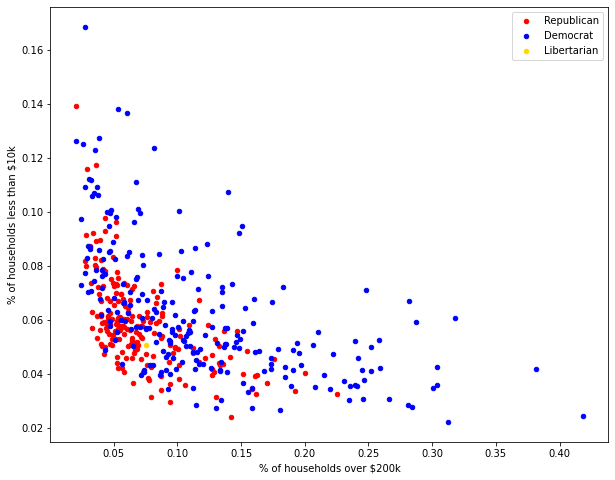

In [130]:
R = result[result['Party'].str.contains('R')]
D = result[result['Party'].str.contains('D')]
L = result[result['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(10, 8))
R.plot.scatter(x='% of households over $200k', y='% of households less than $10k', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households over $200k', y='% of households less than $10k',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households over $200k', y='% of households less than $10k',c='gold',label='Libertarian', ax=ax)
plt.legend()
plt.show()

In [ ]:
'Ratio of $10k to $200k households'
# Show just top 20
colors = {'R':'red', 'D':'blue', 'L':'gold'}
result.sort_values('% of households $50k to $100k', inplace=True)
plt = result.plot.bar(x='District Name', y='% of households $50k to $100k',color= result['Party'].map(colors), figsize=(75, 10));
plt.legend('off')
plt

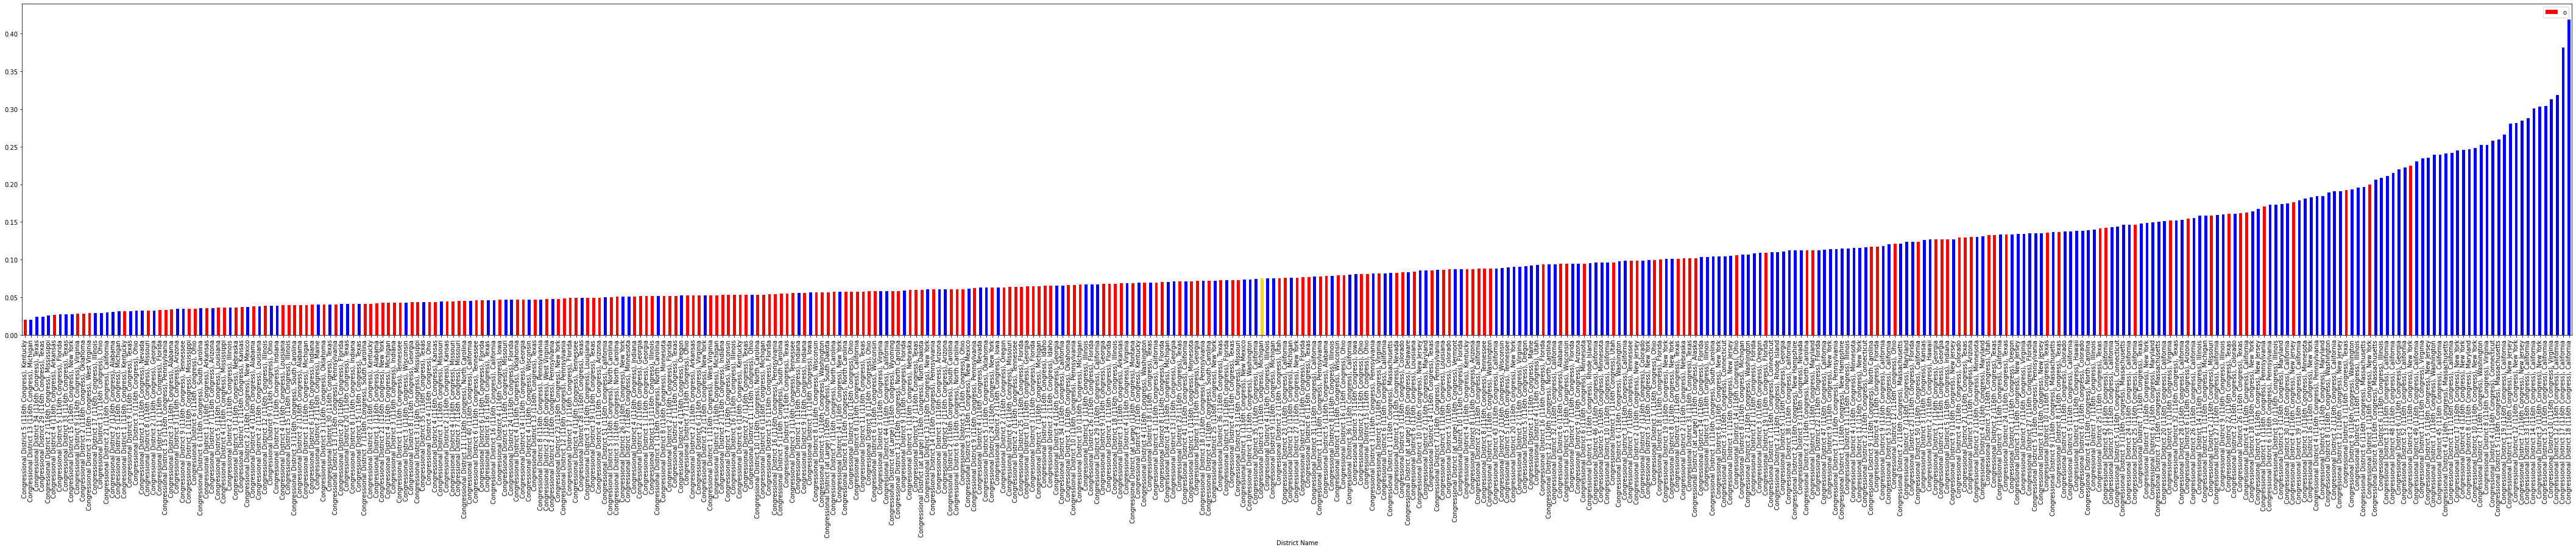

In [145]:
# Show just top 20
colors = {'R':'red', 'D':'blue', 'L':'gold'}
result.sort_values('% of households over $200k', inplace=True)
plt = result.plot.bar(x='District Name', y='% of households over $200k',color= result['Party'].map(colors), figsize=(75, 10));
plt.legend('off')
plt.show()